<a href="https://colab.research.google.com/github/JoDeMiro/LuaLisa/blob/main/Lua_Lisa_03_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np

import time
import math   
import random

import sklearn
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

from copy import deepcopy

from skimage.draw import ellipse


In [2]:
id = np.arange(0, 1, 0.1)
id = np.linspace(0, 1, 100)
beta = 3
y1 = np.sin(id) * beta
y2 = np.sin(id * beta)

print(id.shape)
print(y1.shape)

(100,)
(100,)


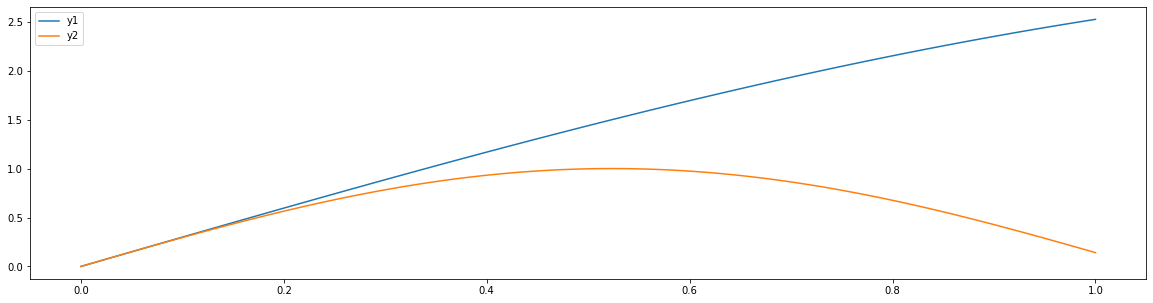

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(id, y1, label='y1')
plt.plot(id, y2, label='y2')
plt.legend()
plt.show()

(100, 1)
(100,)


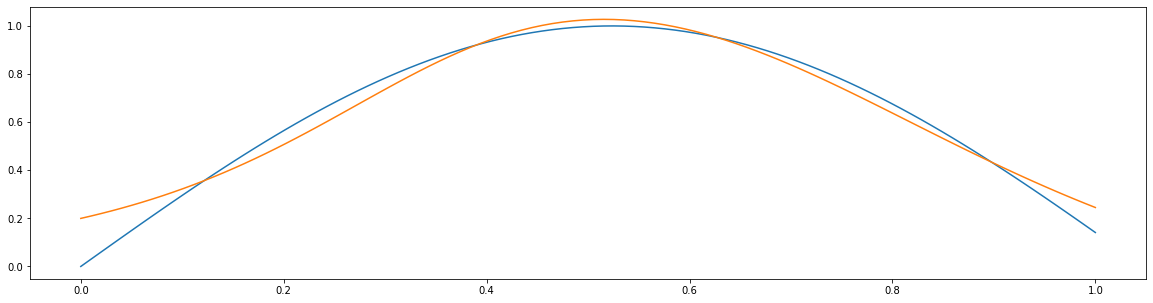

In [4]:
mlp = MLPRegressor(hidden_layer_sizes=(3,2),
                   activation='tanh',
                   solver='adam',
                   batch_size=100,
                   learning_rate_init=0.1,
                   max_iter=200,
                   shuffle=True,
                   random_state=1)

def sin(id = None, beta = None):
  sinus = id * beta
  return beta

input = id.reshape(-1,1)
target = y2
print(input.shape)
print(target.shape)

mlp.fit(input, target)

pred = mlp.predict(input)

plt.figure(figsize=(20, 5))
plt.plot(id, y2, label='y2')
plt.plot(id, pred, label='pred')
plt.show()

## Evoluciós módszerrel keressük a megfelelő paramtéert

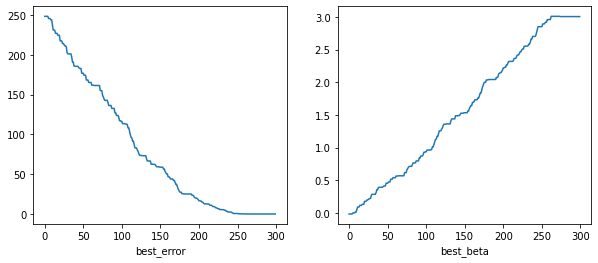

In [5]:
def lathatatlan_fuggveny(id, beta):
  return np.sin(id) * beta

id = np.linspace(0, 1, 100)

beta_amit_keresünk = 3
y1 = lathatatlan_fuggveny(id, beta_amit_keresünk)

decay = 0.1

best_beta_holder  = []
best_error_holder = []
best_beta  = 0
best_error = 99999999
for i in range(300):
  current_beta = best_beta + ((-0.5 + np.random.random()) * decay)
  pred  = lathatatlan_fuggveny(id, current_beta)
  error = np.sum((pred-y1)**2)
  error = float(error)
  if error < best_error:
    best_beta = current_beta
    best_error = error
  best_error_holder.append(best_error)
  best_beta_holder.append(best_beta)
  # print('best_error = {:.3}, best_beta = {:.2} '.format(best_error, best_beta))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(best_error_holder)
ax1.set_xlabel('best_error')
ax2.plot(best_beta_holder)
ax2.set_xlabel('best_beta')
plt.show()

## Lua Lisa

<class 'numpy.ndarray'>
(444, 788, 3)
min 5 and max 227
uint8
uint8


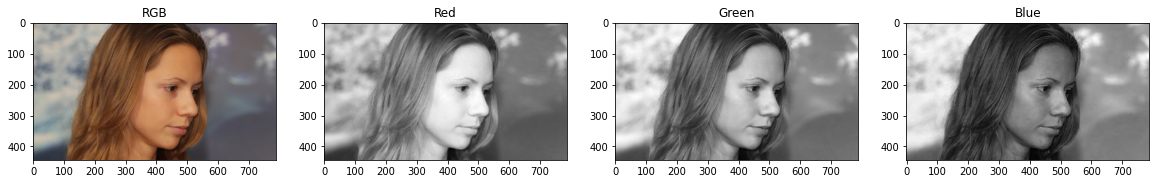

In [6]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman4.jpg')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

print('min {} and max {}'.format(red1.min(), red1.max()))
print(pic1.dtype)
print(red1.dtype)

plt.show()

min 0.054901960784313725 and max 2.2627450980392156


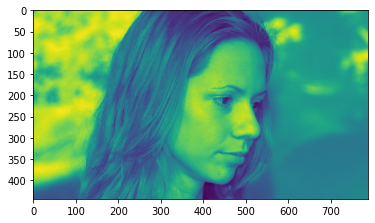

In [7]:
r = red1.astype('float64')
g = green1.astype('float64')
b = blue1.astype('float64')

gray = (r + g + b).astype('float64')

gray = gray/255.0
print('min {} and max {}'.format(gray.min(), gray.max()))
plt.imshow(gray)

## Pilot Cont. 1

In [59]:
abc = 0.1

abc = 0 if abc < 0 else abc

abc

0.1

In [89]:
abc = [1,2,3,4,5,6]

bcb = random.sample(abc, len(abc))

print(abc)
print(bcb)

[1, 2, 3, 4, 5, 6]
[6, 2, 4, 5, 1, 3]


In [ ]:
# csak simán dobáljunk rá köröket -> rendereljük le a képet -> tegyük át mátrix formába és számoljuk ki a képpontonkénti hiba mértékét

# Get shape of original image
height, width = gray.shape[0], gray.shape[1]
print('w:', width, 'h:', height)

# ------- Circle parameters -------------
_number_of_cirles = 200
_min_circle_radius = 10
_max_circle_radius = 100

# ------- Evoltuion paramters -----------
_generation = 5000
_population = 5

_variable_mutation_effect = True          # <-- változtatja azt, hogy milyen mértékben mutálódjanak, a beállított értékeket egy 0,1 közötti érték szerint
                                          #     veszi figyelembe. Egy adott individum esetén minden körre ennek mértékében fogja tompítani a mutációt.
                                          #     Ezzel azt próbálom elérni, hogy néha csak nagyon kicsit módosítson az egyeden, néha meg teljes mértékben.

_rf_r = 10                                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
_rf_c = 10                                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
_rf_rr = 3                                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
_rf_v = 0.05                              # <-- ennyivel tudja módosítani +6- a  _value értékét

# ------- Evoltuion paramters -----------
print_every_solution_result  = False


# ------- Segéd függvény a hibához ------
def calc_distace(original_image, created_image):
  err = np.sum((original_image - created_image)**2)
  return err

# ------- Segéd függvény az ábrához ----
def show_solution(solution):
  p_img = np.zeros((height, width), dtype=np.float64)

  # Menjünk végig az összes körön
  for circle in solution:
    _r = circle.get('_r')
    _c = circle.get('_c')
    _rr = _cr = circle.get('_rr')
    _value = circle.get('_value')

    rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

    # ha kilóg a képből akkor le kell vágni
    rr[rr >= height] = height-1                   # <-- a row a magasság
    cc[cc >= width] = width-1                     # <-- a col a szélesség

    p_img[rr, cc] = _value                        # <-- adjuk hozzá a kört a képhez

  plt.imshow(p_img); plt.show()                   # <-- show image

  return p_img



# ------- Create initial solution -------
def init_solution(_number_of_cirles, _min_circle_radius, _max_circle_radius):
  print('------------------- init_solution -----------------')
  solution = []
  individum = {}
  for i in range(_number_of_cirles):
    _r = np.random.randint(low = 0, high = height-2)    # <-- 788
    _c = np.random.randint(low = 0, high = width-2)     # <-- 0-444
    _rr = _cr = np.random.randint(low = _min_circle_radius, high = _max_circle_radius)
    _value = np.random.rand()                           # <-- 0-1
    individum = {'_r': _r, '_c': _c, '_rr': _rr, '_cr': _cr, '_value': _value}
    solution.append(individum)

  return solution

# Hozzuk létre a kiinduló populációt
intialized_solution = init_solution(_number_of_cirles = _number_of_cirles, 
                                    _min_circle_radius = _min_circle_radius,
                                    _max_circle_radius = _max_circle_radius)

print('-------------- Init solution info ---------------')
print('len(intialized_solution)', len(intialized_solution))
print('type(intialized_solution[0])', type(intialized_solution[0]))
print(intialized_solution[0].keys())
print('-------------------------------------------------')
print('ellenőrizzük le az initial solutiont')
show_solution(intialized_solution)
print('-------------------------------------------------')


# ------- Start evolution --------------

start_time = time.time()

best_solution = deepcopy(intialized_solution)
best_error = 999999999999.0
best_img = None
error_history = []
best_error_history = []

for g in range(_generation):

  # olvassuk be a solutiont -> mutáljuk -> és csináljuk meg ez a alpján a becslést
  
  for p in range(_population):

    p_img = np.zeros((height, width), dtype=np.float64)

    current_solution = []
    individum = {}

    # variáljuk a sorrendet
    # shuffled_solution = random.sample(best_solution, len(best_solution))

    # Menjünk végig az összes körön
    factor = np.random.rand()                                                           # <-- ad egy véletlen számot ennyivel módosítom a határokat
    for circle in best_solution:
      if( _variable_mutation_effect == True ):
        _r = circle.get('_r') + np.random.randint(low = math.floor(factor * -_rf_r), high = math.ceil(factor * _rf_r))
        _r = 0 if _r < 0 else _r
        _r = height if _r > height else _r
        _c = circle.get('_c') + np.random.randint(low = math.floor(factor * -_rf_c), high = math.ceil(factor * _rf_c))
        _c = 0 if _c < 0 else _c
        _c = width if _c > width else _c
        _rr = _cr = circle.get('_rr') + np.random.randint(low = math.floor(factor * -_rf_rr), high = math.ceil(factor * _rf_rr))
        _rr = _min_circle_radius if _rr < _min_circle_radius else _rr                   # <-- ne lehessen kisebb mint az előre megatott érték
        _rr = _max_circle_radius if _rr > _max_circle_radius else _rr                   # <-- ne léphesse túl az előre megadott értéket
        _cr = _rr
        _value = circle.get('_value') + ((-0.5 + np.random.rand()) * _rf_v)               # <-- bug fixed
        _value = 0 if _value < 0 else _value                                            # <-- ne lehessen kisebb mint az előre megatott érték
        _value = 1 if _value > 1 else _value                                            # <-- ne léphesse túl az előre megadott értéket
      else:
        _r = circle.get('_r') + np.random.randint(low = -_rf_r, high = _rf_r)
        _r = 0 if _r < 0 else _r
        _r = height if _r > height else _r
        _c = circle.get('_c') + np.random.randint(low = -_rf_c, high = _rf_c)
        _c = 0 if _c < 0 else _c
        _c = width if _c > width else _c
        _rr = _cr = circle.get('_rr') + np.random.randint(low = -_rf_rr, high = _rf_rr)
        _rr = _min_circle_radius if _rr < _min_circle_radius else _rr                   # <-- ne lehessen kisebb mint az előre megatott érték
        _rr = _max_circle_radius if _rr > _max_circle_radius else _rr                   # <-- ne léphesse túl az előre megadott értéket
        _cr = _rr
        _value = circle.get('_value') + ((-0.5 + np.random.rand()) * _rf_v)               # <-- bug fixed
        _value = 0 if _value < 0 else _value                                            # <-- ne lehessen kisebb mint az előre megatott érték
        _value = 1 if _value > 1 else _value                                            # <-- ne léphesse túl az előre megadott értéket


      # ugyan úgy hozzá kell adnom a egy solution-höz ha utána ki akarom mentei
      individum = {'_r': _r, '_c': _c, '_rr': _rr, '_cr': _cr, '_value': _value}
      current_solution.append(individum)

      rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

      # ha kilóg a képből akkor le kell vágni
      rr[rr >= height] = height-1                   # <-- a row a magasság
      cc[cc >= width] = width-1                     # <-- a col a szélesség

      # adjuk hozzá a kört a képhez
      p_img[rr, cc] = _value


    # Ha meg van az összes kör a képen, akkor számoljuk ki az eredményt
    err = calc_distace(gray, p_img)
    if( print_every_solution_result == True ):
      print('G {} S {}   = {}'.format(g, p, err))

    # Ha ez a hiba jobb mint eddig bármi akkor adjuk hozzá, már generáción belül (igen ez hiba de most nem érdekel)
    if ( err < best_error ):
      best_error = err
      best_solution = deepcopy(current_solution)
      print('Found Better Solution in Generateion {} at Solution {}  ---> Err. = {}'.format(g, p, round(best_error, 5)))
      best_img = p_img                              # <-- ToDo: lehet, hogy Deepcopyzni kell
    
    # Tároljuk el a hibát későbbi elemzésre
    error_history.append(err)
    best_error_history.append(best_error)

  # Néha plotoljunk
  if( g % 50 == 0 ):
    _ = show_solution(best_solution)

end_time = time.time()
run_time = end_time - start_time
print('run_time = ', run_time)

# ---------------------------- VÉGE AZ EVOLUCIÓNAK -----------------------------

# plt.imshow(best_img)

# ---------------------------- VÉGE AZ PROGRAMNAK ------------------------------


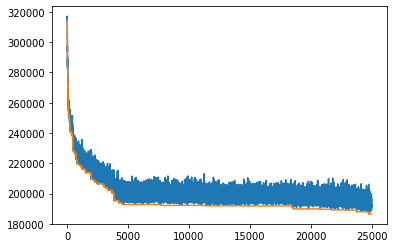

In [112]:
# ------- Segéd függvény a hibához -----
def show_history(history, best_history):
  plt.figure()
  plt.plot(history)
  plt.plot(best_history)
  plt.show()

show_history(error_history, best_error_history)

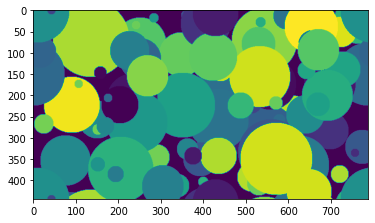

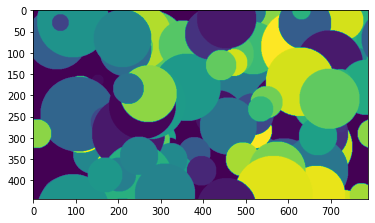

In [77]:
plt.imshow(best_img)
plt.show()

_ = show_solution(intialized_solution)

In [10]:
# Azt kéne még bele tenni, hogy néna csökkentse le a mutáció mértékét oly módon, hogy a mutálandó változó mutációjának mértékét csökkentse.
# Aztán vissza az egész.
# A lényeg, hogy néha nagy lépésekben mutáljon néha csak kicsit.